Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


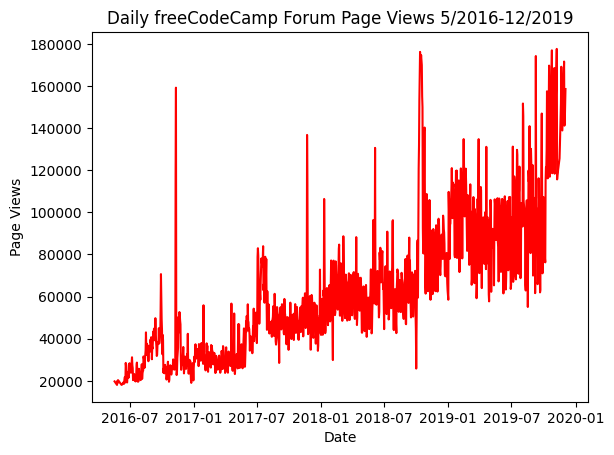

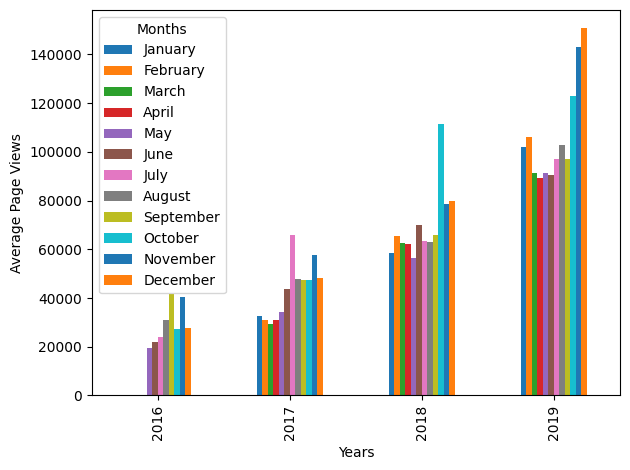

           date   value  year month
0    2016-05-19   19736  2016   May
1    2016-05-26   18060  2016   May
2    2016-05-27   19997  2016   May
3    2016-05-28   19044  2016   May
4    2016-05-29   20325  2016   May
...         ...     ...   ...   ...
1233 2019-11-24  138875  2019   Nov
1234 2019-11-29  171584  2019   Nov
1235 2019-11-30  141161  2019   Nov
1236 2019-12-01  142918  2019   Dec
1237 2019-12-03  158549  2019   Dec

[1238 rows x 4 columns]


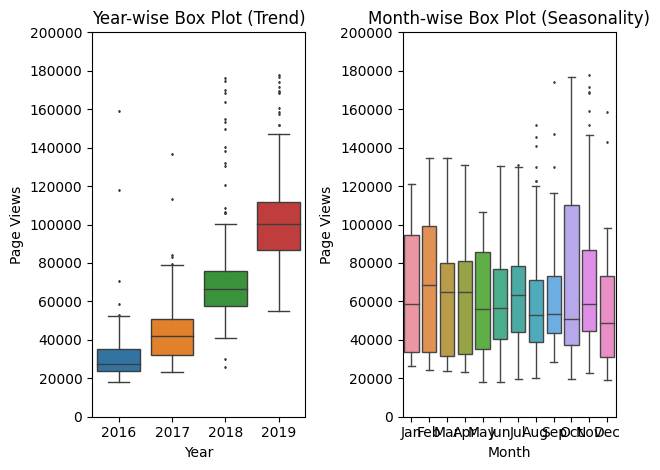

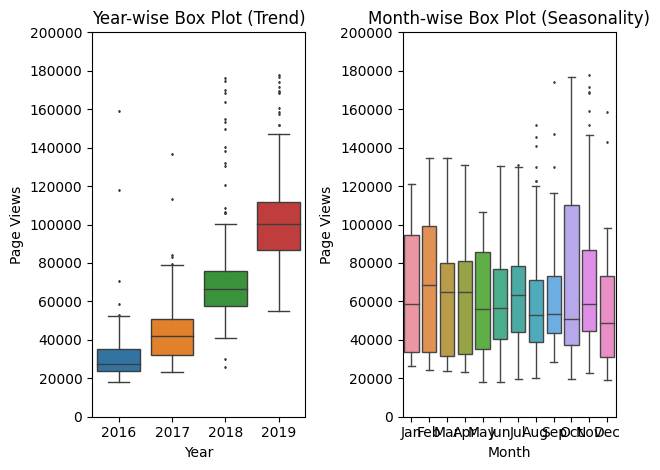

In [3]:
from google.colab import drive
drive.mount('/content/drive')
file = 'drive/My Drive/Colab Notebooks/Resources/fcc-forum-pageviews.csv'

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(file, delimiter=',')
df.index = pd.to_datetime(df['date'])
df = df.drop(labels='date', axis=1)

# Clean data
df = df[(df['value'] < df['value'].quantile(0.975))
        & (df['value'] > df['value'].quantile(0.025))]


def draw_line_plot():
  # Draw line plot
  fig = plt.figure()
  x = df.index
  y = df['value']
  plt.plot(x, y, '-r')
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  plt.ylabel('Page Views')
  plt.xlabel('Date')
  plt.show()

  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig


def draw_bar_plot():
  # Copy and modify data for monthly bar plot
  dict_months = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
  }

  df_bar = df.groupby([df.index.year, df.index.month]).mean().unstack()

  # Draw bar plot
  fig, ax = plt.subplots()
  df_bar.plot(kind='bar', ax=ax)
  ax.set_xlabel('Years')
  ax.set_ylabel('Average Page Views')

  handles, labels = ax.get_legend_handles_labels()
  monthinteger = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
  new_labels = [dict_months[monthinteger] for monthinteger in monthinteger]
  ax.legend(title='Months',
            handles=handles,
            labels=new_labels,
            loc='upper left')

  fig.tight_layout()
  plt.show()

  # Save image and return fig (don't change this part)
  fig.savefig('bar_plot.png')
  return fig


def draw_box_plot():
  # Prepare data for box plots (this part is done!)
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]
  print(df_box)

  # Draw box plots (using Seaborn)
  gridsize = (1, 2)
  fig = plt.figure()
  ax1 = plt.subplot2grid(gridsize, (0, 0))
  ax2 = plt.subplot2grid(gridsize, (0, 1))

  month_order = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                 'Oct', 'Nov', 'Dec')
  sns.boxplot(data=df_box,
              x=df_box['year'],
              y=df_box['value'],
              ax=ax1,
              fliersize=1,
              linewidth=1)
  sns.boxplot(data=df_box,
              x=df_box['month'],
              y=df_box['value'],
              ax=ax2,
              order=month_order,
              fliersize=1,
              linewidth=1)

  ax1.set(ylim=(0, 200000),
          xlabel='Year',
          ylabel='Page Views',
          title='Year-wise Box Plot (Trend)')
  ax1.locator_params(axis='y', nbins=10)
  ax2.set(ylim=(0, 200000),
          xlabel='Month',
          ylabel='Page Views',
          title='Month-wise Box Plot (Seasonality)')
  ax2.locator_params(axis='y', nbins=10)

  fig.tight_layout()
  plt.show()

  # Save image and return fig (don't change this part)
  fig.savefig('box_plot.png')
  return fig

draw_line_plot()
draw_bar_plot()
draw_box_plot()